In [140]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix
from mlxtend.plotting import plot_decision_regions

In [85]:
# Loading dataset as df
df = pd.read_excel("customer_churn_large_dataset.xlsx")
df.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


In [86]:
# All columns
df.columns

Index(['CustomerID', 'Name', 'Age', 'Gender', 'Location',
       'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB',
       'Churn'],
      dtype='object')

In [87]:
# Checking the type of data we have
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CustomerID                  100000 non-null  int64  
 1   Name                        100000 non-null  object 
 2   Age                         100000 non-null  int64  
 3   Gender                      100000 non-null  object 
 4   Location                    100000 non-null  object 
 5   Subscription_Length_Months  100000 non-null  int64  
 6   Monthly_Bill                100000 non-null  float64
 7   Total_Usage_GB              100000 non-null  int64  
 8   Churn                       100000 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 6.9+ MB


In [88]:
# 5 Point Summary
df.describe()

,CustomerID,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,44.027020,12.490100,65.053197,274.393650,0.497790
std,28867.657797,15.280283,6.926461,20.230696,130.463063,0.499998
min,1.000000,18.000000,1.000000,30.000000,50.000000,0.000000
25%,25000.750000,31.000000,6.000000,47.540000,161.000000,0.000000
50%,50000.500000,44.000000,12.000000,65.010000,274.000000,0.000000
75%,75000.250000,57.000000,19.000000,82.640000,387.000000,1.000000
max,100000.000000,70.000000,24.000000,100.000000,500.000000,1.000000


Here we clearly see the contribution of people according to age.
* People with age 31 and lesser having Subscription Length, Monthly Bill, Total data usage less and not going to churn
*As compared to age of 57 and above they consume more data and having monthly plan larger are going to churn.

In [89]:
# Checking for null values
df.isnull().sum()

CustomerID                    0
Name                          0
Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
dtype: int64

From this we will not have to worry about filling any values.

<Axes: xlabel='Gender', ylabel='count'>

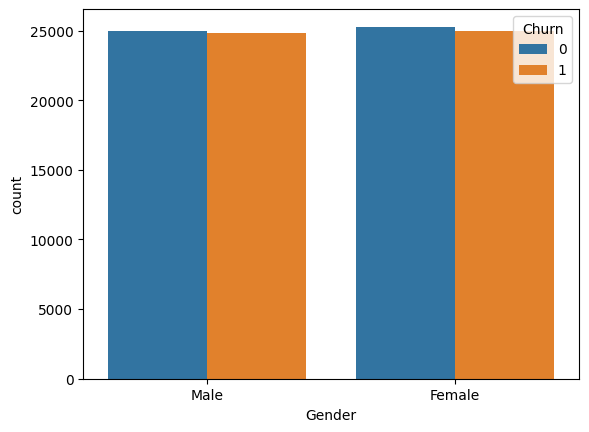

In [90]:
# Let's check out churns according to gender
# From the graph we can see that approximately number of Male and Females are same
sns.countplot(x='Gender',hue='Churn', data=df)

In [91]:
# Checking for number of males and females in our data
df['Gender'].value_counts()

Female    50216
Male      49784
Name: Gender, dtype: int64

In [92]:
df

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0
...,...,...,...,...,...,...,...,...,...
99995,99996,Customer_99996,33,Male,Houston,23,55.13,226,1
99996,99997,Customer_99997,62,Female,New York,19,61.65,351,0
99997,99998,Customer_99998,64,Male,Chicago,17,96.11,251,1
99998,99999,Customer_99999,51,Female,New York,20,49.25,434,1


<Axes: xlabel='Age', ylabel='Monthly_Bill'>

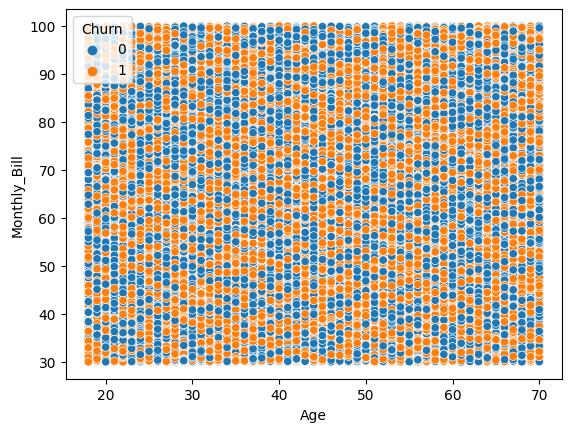

In [93]:
# Plot for monthly bill and age
sns.scatterplot(data=df, x='Age', y='Monthly_Bill', hue='Churn')

From this we can not say anything about the data.

In [94]:
# Let's checkout how many locations we have
df['Location'].value_counts()

Houston        20157
Los Angeles    20041
Miami          20031
Chicago        19958
New York       19813
Name: Location, dtype: int64

We have 5 locations and nearly same values there also

<Axes: xlabel='Location', ylabel='count'>

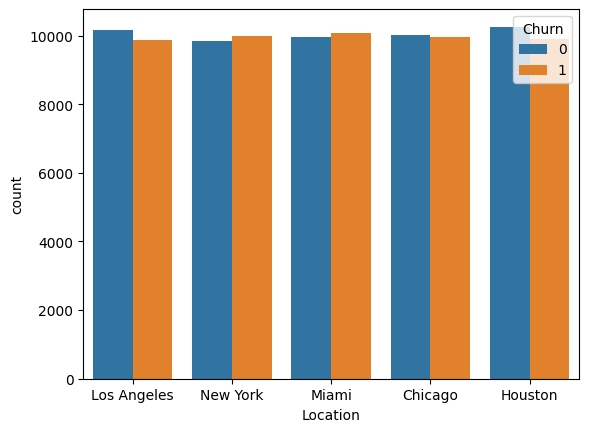

In [95]:
# Let's see the churn according to the locations
sns.countplot(data=df, x='Location', hue='Churn')

Same again data is approximately same everywhere

In [96]:
# Removing unwanted columns

remove_col = ['CustomerID', 'Name', 'Gender', 'Subscription_Length_Months', 'Total_Usage_GB']
df.drop(remove_col, axis=1, inplace=True)

In [98]:
# Converting Gender column to int(1 and 0)
# df['Gender'] = df['Gender'].apply(lambda x:1 if x == 'Male' else 0)

In [99]:
# Using get dummies method
df = pd.get_dummies(df, drop_first=True)
df

,Age,Monthly_Bill,Churn,Location_Houston,Location_Los Angeles,Location_Miami,Location_New York
0,63,73.36,0,0,1,0,0
1,62,48.76,0,0,0,0,1
2,24,85.47,0,0,1,0,0
3,36,97.94,1,0,0,1,0
4,46,58.14,0,0,0,1,0
...,...,...,...,...,...,...,...
99995,33,55.13,1,1,0,0,0
99996,62,61.65,0,0,0,0,1
99997,64,96.11,1,0,0,0,0
99998,51,49.25,1,0,0,0,1


In [100]:
# Converting into features and labels
X = df.drop('Churn', axis=1)
y = df['Churn']

In [101]:
# Splitting data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

In [143]:
# Scaling our features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [144]:
print(X_train.shape)
print(X_test.shape)

(80000, 6)
(20000, 6)


In [145]:
def model_1(model):
  model = model
  model.fit(X_train_scaled, y_train)
  prediction = model.predict(X_test_scaled)
  print('Classification report:')
  print(classification_report(y_test, prediction))
  print('Confusion Metrics:')
  print(confusion_matrix(y_test, prediction))

In [146]:
# Logistic Regression Model
model_1(LogisticRegression())

Classification report:
              precision    recall  f1-score   support

           0       0.50      0.60      0.54     10024
           1       0.50      0.40      0.44      9976

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.49     20000
weighted avg       0.50      0.50      0.49     20000

Confusion Metrics:
[[5977 4047]
 [6007 3969]]


In [147]:
# Random Forest Model
model_1(RandomForestClassifier())

Classification report:
              precision    recall  f1-score   support

           0       0.50      0.50      0.50     10024
           1       0.50      0.50      0.50      9976

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.50     20000
weighted avg       0.50      0.50      0.50     20000

Confusion Metrics:
[[5012 5012]
 [4990 4986]]


* After this I tried out many models but every model is failing like this and I got frustated and stopped this doing.

* I thought that there is nothing missing in this data evrything is very good.

* I had never saw this type of data and that day in night I searched for something like this model is underfitting what to do and I found nothing related to this particular problem.

* In night I was just looking my mobile and found a blog related to **SMOTE-ENN**

* And this is the turning point to go again to the project and start where I left.

In [79]:
from imblearn.combine import SMOTEENN

In [157]:
sme = SMOTEENN(random_state=21)
X_resample, y_resample = sme.fit_resample(X_train, y_train)
X_resample_train, X_resample_test, y_resample_train, y_resample_test = train_test_split(X_resample, y_resample, test_size=0.15,random_state=101)

In [184]:
# Creating new model with resampled data

def model_2(model):
  model = model
  model.fit(X_resample_train, y_resample_train)
  prediction = model.predict(X_resample_test)
  print('Classification Report:')
  print(classification_report(y_resample_test, prediction))
  print('Confusion Metrics:')
  print(confusion_matrix(y_resample_test, prediction))

In [185]:
# Logistic Model
model_2(LogisticRegression())

Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.58      0.55       805
           1       0.50      0.45      0.48       764

    accuracy                           0.52      1569
   macro avg       0.51      0.51      0.51      1569
weighted avg       0.52      0.52      0.51      1569

Confusion Metrics:
[[464 341]
 [418 346]]


In [186]:
# Random Forest Model
model_2(RandomForestClassifier(n_estimators=121,random_state=121))

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.89      0.91       805
           1       0.89      0.92      0.91       764

    accuracy                           0.91      1569
   macro avg       0.91      0.91      0.91      1569
weighted avg       0.91      0.91      0.91      1569

Confusion Metrics:
[[718  87]
 [ 60 704]]


In [187]:
# Saving our model

import pickle

filename = 'model.pkl'
pickle.dump(model_2, open(filename, 'wb'))

I think this is it.

Because I haven't work with pipeline a lot so

Thank you for giving me a chance

Please Sir tell me Is it good for future for me or not

If I am selecting or not that doesn't mean anything

Just let me know about my work.

* GMAIL- himanshuyadav09911@gmail.com